In [2]:
import pandas as pd

In [3]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv"

In [4]:
from pandas import read_csv

In [5]:
data=read_csv(url,header=None)

In [6]:
data.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
data.shape

(306, 4)

In [8]:
data.describe()

,0,1,2,3
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

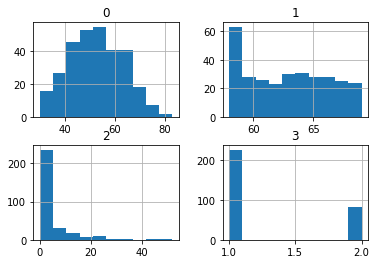

In [9]:
data.hist()

In [13]:
from collections import Counter
columns=['age','year','nodes','class']
data_names=read_csv(url,header=None,names=columns)
data_names

,age,year,nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [18]:
 target=data_names['class'].values
print(target)

[1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2
 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 2 1
 1 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 2 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1
 1 1 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1
 1 1 1 2 1 1 1 1 2 2]


In [21]:
counter=Counter(target)
print(counter)
for key,value in counter.items():
    percentage=value/len(target)*100
    print('class= %d, count= %d, percentage= %.3f %%' %(key,value,percentage))

Counter({1: 225, 2: 81})
class= 1, count= 225, percentage= 73.529 %
class= 2, count= 81, percentage= 26.471 %


In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
x,y=data.values[:,:-1],data_names.values[:,-1]
x=x.astype('float32')
y=LabelEncoder().fit_transform(y)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.5,stratify=y
                                          ,random_state=3)

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_features=x.shape[1]

model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(n_features,)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
#verbose=0 to hide info.
history=model.fit(xtrain,ytrain,epochs=200,batch_size=20,validation_data=(xtest,ytest))

Epoch 1/200
8/8 [==============================] - 1s 23ms/step - loss: 8.2459 - accuracy: 0.2614 - val_loss: 7.2320 - val_accuracy: 0.2680
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 6.5943 - accuracy: 0.2614 - val_loss: 5.5901 - val_accuracy: 0.2680
Epoch 3/200
8/8 [==============================] - 0s 7ms/step - loss: 4.9860 - accuracy: 0.2484 - val_loss: 3.9370 - val_accuracy: 0.2876
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 3.4507 - accuracy: 0.2941 - val_loss: 2.5063 - val_accuracy: 0.3399
Epoch 5/200
8/8 [==============================] - 0s 7ms/step - loss: 2.2666 - accuracy: 0.4052 - val_loss: 1.5541 - val_accuracy: 0.4575
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 1.5374 - accuracy: 0.4837 - val_loss: 1.1491 - val_accuracy: 0.5490
Epoch 7/200
8/8 [==============================] - 0s 7ms/step - loss: 1.2976 - accuracy: 0.5621 - val_loss: 1.0681 - val_accuracy: 0.5882
Epoch 8/200
8/8 [=========

In [37]:
from sklearn.metrics import accuracy_score

y_predict=(model.predict(xtest)>.5).astype(int)
score=accuracy_score(ytest,y_predict)
print('Acc: %.3f %%' % score)

5/5 [==============================] - 0s 1ms/step
Acc: 0.765 %


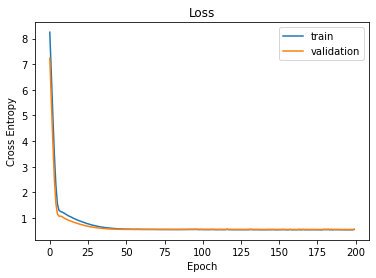

In [38]:
from matplotlib import pyplot
pyplot.title('Loss')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='validation')
pyplot.legend()

pyplot.show()

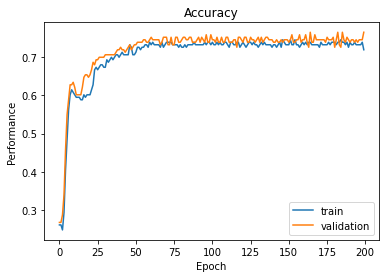

In [39]:
from matplotlib import pyplot
pyplot.title('Accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Performance')
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='validation')
pyplot.legend()

pyplot.show()